In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2

In [215]:
images = os.listdir("Train/Images/")

In [6]:
len(images)

304

In [217]:
train = pd.read_csv("Train/train.csv")

In [49]:
dic= {
    0 : "Pikachu",
    1 : "Bulbasaur",
    2 : "Charmander"
}
reverse_dic= {
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Charmander":2
}

In [195]:
X = []
Y = []

In [196]:
for im in images:
    im_path ="Train/Images/"+im
    
    img = cv2.imread(im_path)
    img = cv2.resize(img, (100,100))
    X.append(img)
    lab = reverse_dic[list(train[train['ImageId'] == im]['NameOfPokemon'])[0]]
    Y.append(lab)

In [197]:
X = np.array(X)
Y = np.array(Y)

In [198]:
print(X.shape)
print(Y.shape)

(304, 100, 100, 3)
(304,)


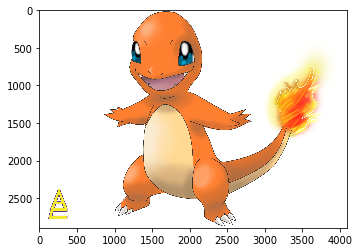

In [219]:
i = plt.imread("Train/Images/"+images[300])
plt.imshow(i)

## KNN

In [220]:
def dist(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))
def knn(x, y, query_point, k=5):
    m = x.shape[0]
    all_distance = []
    for i in range(m):
        d = dist(query_point, x[i])
        all_distance.append((d, y[i]))
    
    all_distance = sorted(all_distance)[0:k]
    all_distance = np.array(all_distance)[:,1]
    
    unique, freq = np.unique(all_distance, return_counts=True)
    freq = np.argmax(freq)
    return dic[int(unique[freq])]

## Testing

In [206]:
for i in range(10):
    testimg = "Train/Images/"+images[i]
    testimg = cv2.imread(testimg)
    testimg = cv2.resize(testimg, (100,100))
    print(knn(X, Y, testimg))

Charmander
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu


### Random Image for testing

In [210]:
rnd = np.random.randint(304)
testimg = "Train/Images/"+images[rnd]
testimg = cv2.imread(testimg)
testimg = cv2.resize(testimg, (100,100))

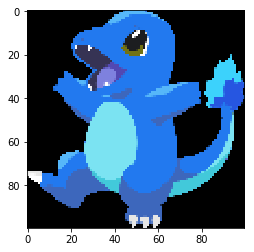

In [208]:
plt.imshow(testimg)

In [209]:
knn(X,Y, testimg)

'Charmander'